# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек

Выполнил студент гр. 9303 **Халилов Шохбоз** Вариант №19.

## Цель работы

&emsp; Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.

***
## Основные теоретические положения
###  Бинарный метод

&emsp; **Бинарный метод** - это один из способов быстрого возведения числа в степень $ n \in N $. Мощность представлена в двоичной системе, старший бит отбрасывается, после чего все биты сканируются, и, 
$$ 
f(x) = \left\{\begin{matrix}
  x^2 &,  bit = 0 \\ 
  x^2*x_0 & ,bit = 1 
\end{matrix}\right.
$$
Количество умножений рассчитывается по следующей формуле: $ \lambda (n) + \nu (n) -1 $, где $ \lambda (n) = \lceil log_2 n \rceil, \nu (n) $ - количество единиц в двоичной системе счисления.\

#### определения:
* $ \lambda (n) $ - длина двоичной записи числа $ n $, уменьшенная на единицу. 
* $ \nu (n) $ - это вес Хэмминга (количество ненулевых значений в числовой записи).

***
###  Метод множителей

&emsp; **Метод множителя**-это метод быстрого возведения в степень числа $ x^n $. 

$$ x^n: \:\: n = i*j; \:\:$$ где $\: i$- минимальный простой делитель числа $n$
$$x^i = y; \:\: y^j = x^n $$
Если $ n $ - простое число, то число $ n-1 $ разлагается на множители и, получив результат, умножается на $ x $.
***

### Аддитивные цепочки

&emsp; **Аддитивная цепочка** для $ n \in N $ - последовательность $ 1 = a_0, ..., a_m = n $ , где  $ a_i = a_j + a_k $ , $    k \leqslant j \lt i,  $ , $ \forall i = 1..m $ .

Функция $ l(n) $ - наименьшая длина аддитивной цепочки.

Типы шагов:

1. Удвоение, если $ j = k = i - 1 $ .

2. Звездный, если $ j = i - 1 $ .

3. Малый, если $ \lambda (a_i) = \lambda (a_{i-1}) $ .

Звездная цепочка - аддитивная цепочка, состоящая только из звездных шагов.
***

### Теорема Брауэра
$l(n)  \lt  (1+k^{-1}) \cdot \lceil log_2 n \rceil + 2^{k-1}-k+2$, при $k  \lt log_2 log_2 n$
***

### Алгоритм Брауера
&emsp; **Алгоритм Брауера** вычисляет n-ую стпенень за 
$\lambda(n)+ \frac{(1 +\: o(1))\:\lambda(n)} {\lambda(\:\lambda(n))}$ операций.
&emsp; Для некоторых  n,  k Брауерские цепочки задаются в виде рекурентной формулы: 

$$B_k(n) =\begin{cases}1, 2, 3, ..., 2^k-1\text{, если }n < 2^k \\ B_k(q), 2q, 4q, 8q, ..., 2^kq, n,\text{ если } n \geqslant 2^k\ \text{и } q = \lfloor\frac{n}{2^k}\rfloor \end{cases}$$
***

### Следствие теоремы Брауэра:

&emsp; Пусть $k=\lambda(\lambda(n))-2\lambda(\lambda(\lambda(n)))$, тогда получаем следствие из теоремы:

$$\lim \limits_{n \to \infty} \frac{l(n)}{\lambda(n)}=1$$

***

### Гипотеза Шольца-Брауэра:
$ l(2^n - 1) \leqslant l(n) + n - 1  $ для $ n \leqslant 64 $ .
***

## Постановка задачи
&emsp; Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

### Порядок выполнения работы
1. Применить бинарный метод и метод множителей для $x^n$, где $n \geq 30$, для $2-3$ значений $n$ (значения $n$ выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.
2. Реализовать алгоритм Брауэра для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра $k$, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.
3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при $n \geq 500$. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.
4. Проверить следствие 1 теоремы Брауэра для $n = 1..200$ путём построения функции $l(n)$ и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.
5. Проверить гипотезу Шольца–Брауэра для $1 < n \leq 10$ на алгоритме дробления вектора индексов. Сделать выводы.
6. Дополнительное необязательное задание: найти и/или предложить модификации алгоритмов и привести описание модификаций. Реализовать модифицированные алгоритмы и сравнить их мощность.
***

## Выполнение работы
### Реализация бинарного метода

In [36]:
def BinaryMethod(x, n):
    bits = [ int(i) for i in list(bin( n ))[3:]]
    tmp = x
    for bit in bits:
        tmp = tmp**2*x if bit else tmp**2
    return tmp

BinMethodOperationCount = lambda n: n.bit_length()+bin(n).count('1')-2

### Реализация метода множителя

In [37]:
def Factorization(n):
    d, multipliers = 2, []
    while d**2 <= n:
        if n % d == 0:
            multipliers.append(d)
            n //= d
        else:
            d += 1
    if n > 1:
        multipliers.append(n)
    return multipliers

def MultiplierMethod(x, n):
    multipliers = Factorization(n)
    tmp, operation = x, 0
    for mul in multipliers:
        operation += BinMethodOperationCount(mul)
        tmp = BinaryMethod(tmp, mul)
    return operation, tmp

#### Проведём несколько тестов и сравним результаты.

Таблица с количеством операций для каждого метода для $n=39,\: 69,\: 99,\: 123$


№|Значение n | Количество операций БМ | Количество операций ММ |
:--------:|:-------------:|:-------------------:|:---------------:
1|39 | 8 |7
2|69 | 8 |9
3|99 | 9 |9
4|123|11 |9


**Вывод** \
  результат тестирования показывает, что метод множителей сравним с бинарным методом по количеству операций, только иногда он лучше.
  ***

## Реализация алгоритма Брауэра

In [38]:
def BrowerAlgorithm(N, K, Bn):
    if N < 2**K:
        [Bn.append(i) for i in range(1, 2**K)]
        return Bn
    else:
        q = N//(2**K)
        BrowerAlgorithm(q, K, Bn)
        for _ in range(K):
            q*=2
            Bn.append(q)
        Bn.append(N)
    return Bn

#### Проведём несколько тестов и сопоставим длины полученных аддитивных цепочек

**Число**|**k**|**Цепочка**|**Длина**
:-----:|:-----: |:-----|:-----:
    654|2|[1, 2, 3, 4, 8, 10, 20, 40, 80, 160, 163, 326, 652, 654]|13
715|3|[1, 2, 3, 4, 5, 6, 7, 8, 11, 22, 44, 88, 89, 178, 356, 712, 715]|16
787|3|[1, 2, 3, 4, 5, 6, 7, 8, 12, 24, 48, 96, 98, 196, 392, 784, 787]|16
725|2|[1, 2, 3, 4, 8, 11, 22, 44, 45, 90, 180, 181, 362, 724, 725]|14
852|5|[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 52, 104, 208, 416, 832, 852]|36
898|2|[1, 2, 3, 6, 12, 14, 28, 56, 112, 224, 448, 896, 898]|12
608|4|[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 32, 38, 76, 152, 304, 608]|21
54|5|[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 54]|32
775|3|[1, 2, 3, 4, 5, 6, 7, 8, 12, 24, 48, 96, 192, 384, 768, 775]|15
178|3|[1, 2, 3, 4, 5, 6, 7, 8, 16, 22, 44, 88, 176, 178]|13

#### Выводы по методу Брауэра
Минимальная аддитивная цепочка получается при 𝑘 = 𝜆 (𝜆 (𝑛)), иначе результат будет хуже. Увеличение k только ухудшает результат.
***

## Реализация метода дробления вектора индексов.

In [39]:
def Decrement(vector, q, m):
    for i in range(m, q, -1):        
        if vector[i-1] > 1:
            vector[i-1] -= 1
            return vector
        else: 
            vector[i-1] = i
    return vector
 
def getStarChain(vector):
    chain = [1]
    for i in vector:
        chain.append(chain[-1] + chain[i-1]) 
    return chain

def splitting(n):
    
    for m in range(n.bit_length(), n.bit_length()+bin(n).count('1')):
        vector = [i for i in range(1, m)]
        q = m // 2 - 1

        while True:
            chain = getStarChain(vector)
            if chain[m-1] == n: 
                return chain

            if n < (chain[q]+m-q) or chain[q]*2**(m-q) < n:
                vector = Decrement(vector, 0, q)
                if sum(vector[:q]) == abs(q):
                    break 
            
            else:
                vector = Decrement(vector, q, m-1)
                if sum(vector[q:]) == abs(m-q-1):
                    break  
                        
    return chain

**Число**|**Длина**|**Время выполнения, сек**|**Аддитивная цепочка**
:-----:|:-----:|:-----:|:-----
501|13|1.38|[1, 2, 4, 8, 16, 32, 64, 96, 100, 200, 400, 500, 501]
523|13|1|[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 520, 522, 523]
761|14|10.4|[1, 2, 4, 8, 16, 32, 64, 128, 160, 168, 296, 592, 760, 761]
934|14|9.66|[1, 2, 4, 8, 16, 32, 64, 128, 256, 288, 290, 580, 870, 934]
1023|13|20.6|[1, 2, 4, 8, 16, 32, 64, 68, 136, 272, 340, 341, 682, 1023]
1252|14|9.47|[1, 2, 4, 8, 16, 32, 64, 128, 256, 384, 416, 832, 1248, 1252]

#### Выводы по методу дробления вектора индексов 
метод дробления вектора индексов всегда дает самую короткую аддитивную цепочку по длине, в отличие от алгоритма Брауэра. Но алгоритм работает намного медленнее.
***

## Проверка следствия Брауэра.

In [46]:
import pylab as plt
from math import e, log

def creat_geraph(n, callback):
    
    lengths, x, lnx, lnx2 = [],[],[],[]
    
    for i in range(1, n):
        lengths.append(len(callback(i)))
        x.append(i)
        lnx.append(log(i, e))
        lnx2.append(log(i, e)**2) 
    
    power = [lengths[i] * lnx[i] for i in range(n-1)]
    
    b = (n*sum(power) - sum(lengths)*sum(lnx)) \
    /(n*sum(lnx2) - sum(lnx)*sum(lnx))
    
    a = (sum(lengths) - b * sum(lnx))/(n-1)
    
    y = [a + b*lnx[i] for i in range(n-1)]

    plt.figure(figsize=(12, 8))
    plt.scatter(x, lengths, color='red', marker = '.')
    plt.plot(x, y, color='green', marker = '.')
    plt.show()


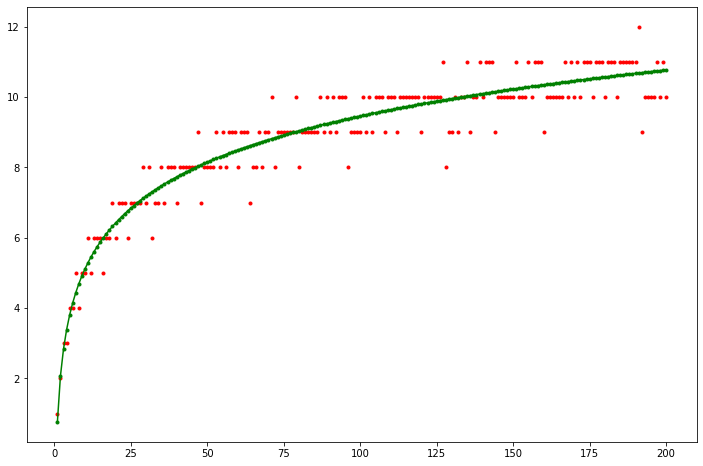

In [47]:
creat_geraph(201, splitting)

#### Выводы по проверке следствия Брауэра.
На графике видно, что набор значений минимальных длин аддитивных цепочек аппроксимируется логарифмической кривой. Это подтверждает первое следствие теоремы Брауэра.
***

## Проверка гипотезы Шольца–Брауэра.

гипотеза Шольца-Брауэра:\
$l(2^n-1) \leq l(n) + n - 1: n = 2,...,10.$

In [ ]:
for i in range(2, 11):
    a = f"{len(splitting(2**i-1))} <= {len(splitting(i))+i-1} :n = {i}"
    print(a)

$$3 \ \leqslant 3 :n = 2 \\
5  \leqslant 5 :n = 3\\
6  \leqslant 6 :n = 4\\
8  \leqslant 8 :n = 5\\
9  \leqslant 9 :n = 6\\
11 \leqslant 11 :n = 7\\
11 \leqslant 11 :n = 8\\
13 \leqslant 13 :n = 9\\
14  \leqslant 14 :n = 10$$


#### Выводы по проверке гипотезы Шольца–Брауэра.
результаты теста показывают, что гипотеза верна для $n=2,...,10$. 
***

## Общий вывод по проделанной работе.

* В ходе выполнения практической работы были изучены и реализованы следующие методы поиска аддитивных цепочек для заданного числа:

    1. Алгоритм Брауэра 
    2. Алгоритм дробления вектора индексов
    
    
* Также были реализованы методы быстрого возведения в степень
    1. Бинарный метод 
    2. Метод множителей 


* Проведена проверка следствия теоремы Брауэра

* Проведена проверка гипотезы Шольца-Брауэра